# Tesnorflow Scratchpad

## Regression
Trying to reproduce sine


In [9]:
# Tensorflow Linear regression 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class Regression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (Regression)
        self.ypred = ypred  = tf.add(tf.mul(X, W), b)
        #defining the cost of 
        self.cost = tf.reduce_sum(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(100):
                final_y = []
                for (x, y) in zip(trX, trY):
                    self.sess.run(op, feed_dict={self.X: [[x]], self.Y: [[y]]})
                    c = self.sess.run(self.cost, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    costs.append(np.max(c))
                    final_y.append(yf)
                avg_cost.append(np.mean(costs))
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(2,figsize=(20,10))
            axarr[0].plot(avg_cost)
            axarr[0].set_title('Cost and Prediction Plot')
            axarr[0].set_xlabel("iteration")
            axarr[1].scatter(trX, final_y)
            axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)    

In [68]:
trX = np.linspace(-2, 2, 200)
#trY = 2 * trX + np.random.randn(*trX.shape) * 0.33
# Adding some noise
trY = np.sin(trX)+ np.random.randn(*trX.shape) * 0.66

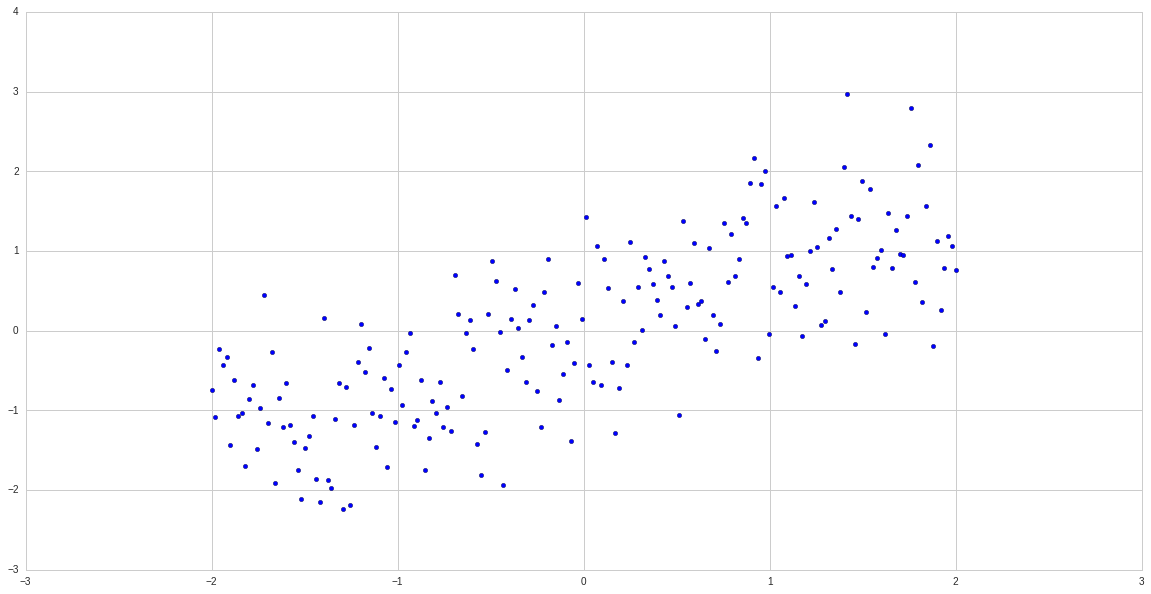

In [11]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.scatter(trX,trY)

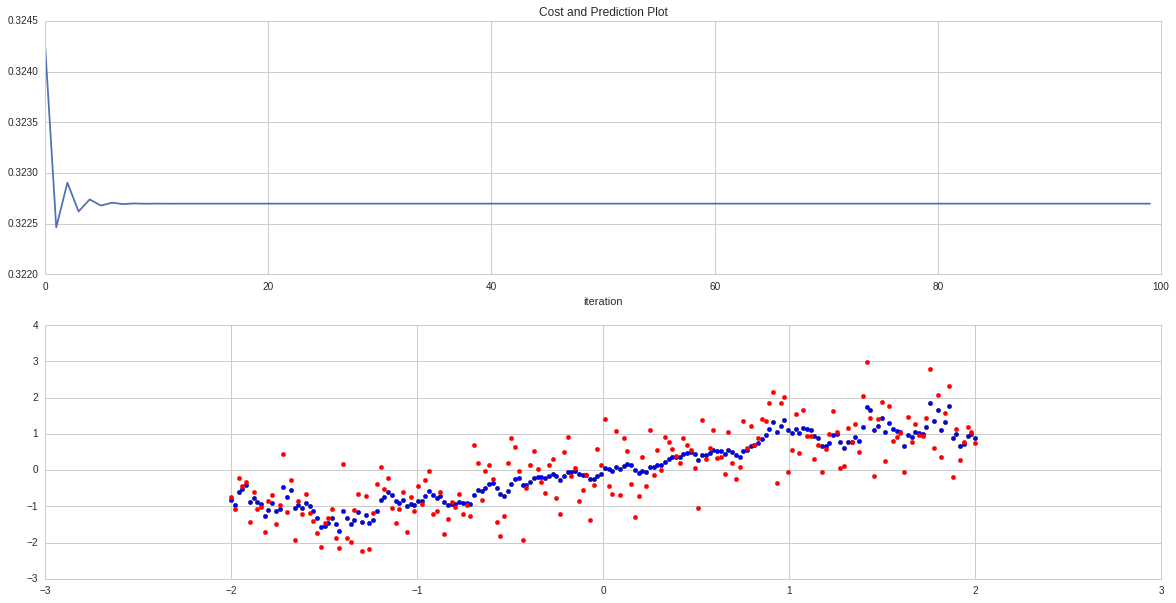

In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
reg = Regression(1,1)

reg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY)

## Logistic Regression
Using MNIST dataset

In [65]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class LogisticRegression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        #defining the cost of 
        self.cost = tf.reduce_mean(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
            #axarr[1].scatter(trX, final_y)
            #axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)   

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
trX, trY, teX, teY = mnist.train.images[:5000], mnist.train.labels[:5000], mnist.test.images, mnist.test.labels

0  iteration : Mean cost 0.0895251
100  iteration : Mean cost 0.0507796
200  iteration : Mean cost 0.0361848
300  iteration : Mean cost 0.0293383
400  iteration : Mean cost 0.0256177
500  iteration : Mean cost 0.0233001
600  iteration : Mean cost 0.0217004
700  iteration : Mean cost 0.0205146
800  iteration : Mean cost 0.0195887
900  iteration : Mean cost 0.0188375
1000  iteration : Mean cost 0.0182102
1100  iteration : Mean cost 0.0176745
1200  iteration : Mean cost 0.017209
1300  iteration : Mean cost 0.0167987
1400  iteration : Mean cost 0.0164327
1500  iteration : Mean cost 0.0161031
1600  iteration : Mean cost 0.0158037
1700  iteration : Mean cost 0.0155298
1800  iteration : Mean cost 0.0152775
1900  iteration : Mean cost 0.015044
2000  iteration : Mean cost 0.0148266
2100  iteration : Mean cost 0.0146236
2200  iteration : Mean cost 0.0144331
2300  iteration : Mean cost 0.0142538
2400  iteration : Mean cost 0.0140844
2500  iteration : Mean cost 0.0139241
2600  iteration : Mean cos

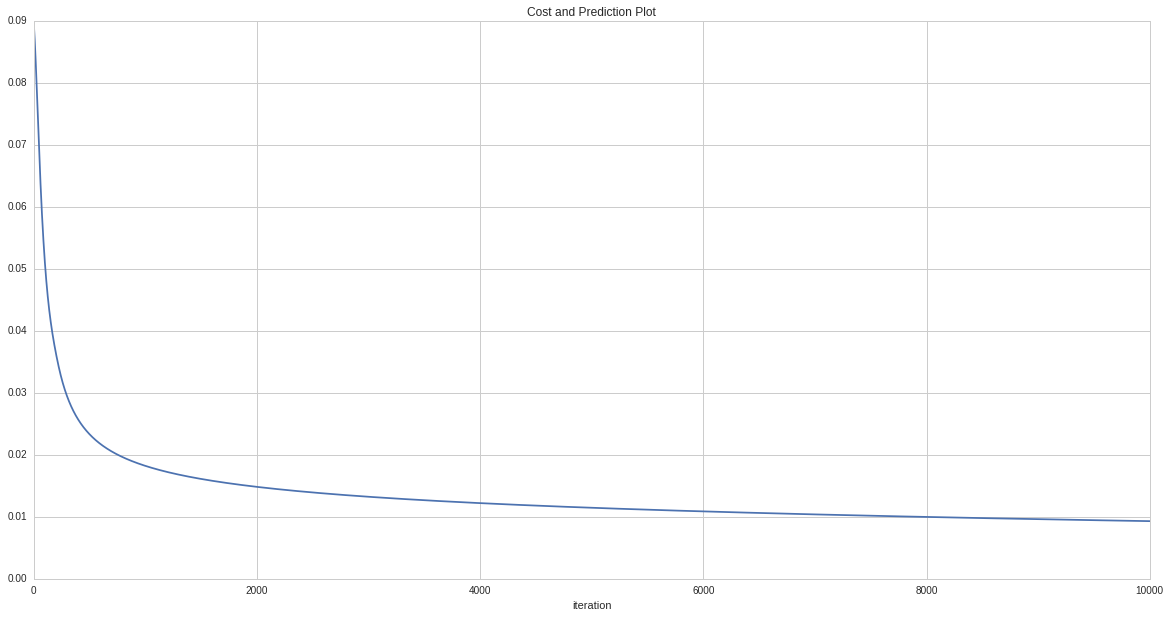

In [67]:
ops.reset_default_graph()
lreg = LogisticRegression(784,10)
lreg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY,10000,400)

Simple example of mean by axis

In [60]:
a = [[1,2,3],[1,2,3]]
b = [[2,3,4],[2,3,4]]
ap = tf.placeholder("float32", [2, 3])
bp = tf.placeholder("float32", [2, 3])
c = tf.reduce_mean(tf.pow(ap - bp,2),1)
with tf.Session() as sess:
    print sess.run(c, feed_dict={ap: a,bp:b})

[ 1.  1.]


## Reinforce Algorithm

This uses the softmax for actions works with gym environment. Currently, for discrete action space

In [80]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="output")
        self.r = r = tf.placeholder("float32",name="Reward")

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        #small value 
        epsilon =1e-8 
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        #defining the cost of 
        self.gradient = tf.reduce_mean(tf.log(ypred+epsilon))
    
    
    
    def train(self,optimizer,learning_rate,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
    def collect_trajectories(self,env,horizon):
        obs = env.reset() # starting state
        done = 0
        t = 0
        T = horizon
        
        env_history = []
        while done == 0 and t < T-1:
            action = env.action_space.sample() # your agent here (this takes random actions)
            observation, reward, done, info = env.step(action)
            env_history.append((observation,reward))
            t = t + 1
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
        print env_history 

In [70]:
opt = tf.train.GradientDescentOptimizer(0.01)

In [82]:
import gym
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)

[2016-08-22 16:57:44,612] Making new env: CartPole-v0


In [74]:
for e in tf.trainable_variables():
    print e.name

weight:0
b:0


In [83]:
rf.collect_trajectories(env,100)

Episode finished after 11 timesteps
[(array([ 0.0164848 ,  0.19950676, -0.03714651, -0.31877446]), 1.0), (array([ 0.02047493,  0.00493301, -0.043522  , -0.03803373]), 1.0), (array([ 0.02057359,  0.20065117, -0.04428267, -0.3441244 ]), 1.0), (array([ 0.02458662,  0.39637419, -0.05116516, -0.65043598]), 1.0), (array([ 0.0325141 ,  0.59217006, -0.06417388, -0.95878144]), 1.0), (array([ 0.0443575 ,  0.78809336, -0.08334951, -1.27091562]), 1.0), (array([ 0.06011937,  0.9841745 , -0.10876782, -1.58849266]), 1.0), (array([ 0.07980286,  1.18040764, -0.14053767, -1.91301766]), 1.0), (array([ 0.10341101,  1.37673668, -0.17879803, -2.24578996]), 1.0), (array([ 0.13094574,  1.18369631, -0.22371382, -2.01313252]), 1.0)]
